In [1]:
!pip install transformers

## 1. Load Financial Phrasebank Dataset

In [2]:
file1 = open("Sentences_AllAgree.txt", "r")
data=file1.readlines()

In [3]:
data[0]

'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .@neutral\n'

#### using list comprehension

In [4]:
sentence, label = [d.strip().split('@')[0] for d in data], [d.strip().split('@')[1] for d in data]

In [5]:
len(sentence), len(label)

(2264, 2264)

#### using for loop

In [6]:
# split using @ to create sentences and labels lists.

sentence=[] 
label=[]
for d in data:
    sentence.append(d.strip().split('@')[0])
    label.append(d.strip().split('@')[1])

In [7]:
data[0]

'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .@neutral\n'

In [8]:
len(sentence),len(label)

(2264, 2264)

In [9]:
#create pandas dataframe for the datasets

import pandas as pd

df = pd.DataFrame({"Sentence":sentence, "Label":label})
df

,Sentence,Label
0,"According to Gran , the company has no plans t...",neutral
1,"For the last quarter of 2010 , Componenta 's n...",positive
2,"In the third quarter of 2010 , net sales incre...",positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive
...,...,...
2259,Operating result for the 12-month period decre...,negative
2260,HELSINKI Thomson Financial - Shares in Cargote...,negative
2261,LONDON MarketWatch -- Share prices ended lower...,negative
2262,Operating profit fell to EUR 35.4 mn from EUR ...,negative


In [10]:
df.Label.value_counts()

neutral     1391
positive     570
negative     303
Name: Label, dtype: int64

In [11]:
df.head(10)

,Sentence,Label
0,"According to Gran , the company has no plans t...",neutral
1,"For the last quarter of 2010 , Componenta 's n...",positive
2,"In the third quarter of 2010 , net sales incre...",positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive
5,Finnish Talentum reports its operating profit ...,positive
6,Clothing retail chain Sepp+ñl+ñ 's sales incre...,positive
7,Consolidated net sales increased 16 % to reach...,positive
8,Foundries division reports its sales increased...,positive
9,"HELSINKI ( AFX ) - Shares closed higher , led ...",positive


## 2. Load & Infer Pretrained Model 

In [12]:
# import mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis model from huggingface
# tried siebert/sentiment-roberta, but did not perform well.

from transformers import pipeline
#sentiment_analysis = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")

In [13]:
fin_sentiment_analysis = pipeline("sentiment-analysis", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

In [14]:
# testing on one sample
sentence = "he is a good boy"
fin_sentiment_analysis(sentence)

[{'label': 'neutral', 'score': 0.9997739195823669}]

In [15]:
#taking sample 200 sentence for analyzation and appending it in model_prediction
model_prediction = []
indexes = []
for index, row in df.sample(200).iterrows():
    model_prediction.append(fin_sentiment_analysis(row['Sentence'])[0]['label'].lower())
    indexes.append(index)

In [16]:
len(model_prediction)

200

In [17]:
df_head=df.iloc[indexes]

In [18]:
df_head.shape

(200, 2)

In [19]:
#create model prediction column
df_head["Prediction"]=model_prediction

C:\Users\vinay\AppData\Local\Temp\ipykernel_30884\3040885475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_head["Prediction"]=model_prediction


In [20]:
df_head.head()

,Sentence,Label,Prediction
595,Stock Exchange Release 10/3/2011 12:00 Sanoma ...,neutral,neutral
713,"The total scope of the project is about 38,000...",neutral,neutral
664,It is hand-painted resin with real 14-0 treble...,neutral,neutral
2153,Net profit in the three months through March 3...,negative,negative
1609,Cargotec 's business areas also include the co...,neutral,neutral


## 3. Accuracy Metrics: Checking Performance

In [21]:
#import accuracy, confusion matrix library
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
acc = accuracy_score(df_head.Label,df_head.Prediction)

In [23]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 1000)

In [24]:
#code to calculate confusion matrix using sklearn
df_cm = confusion_matrix(df_head.Label,df_head.Prediction, labels=["positive", "negative", "neutral"])

In [25]:
#seaborn plot for plotting confusion matrix
import seaborn as sn

<Axes: >

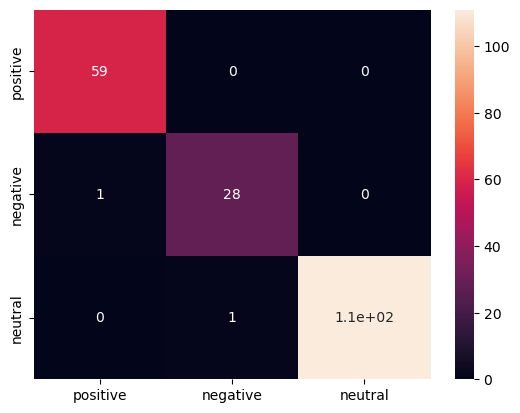

In [26]:
sn.heatmap(pd.DataFrame(df_cm, index=["positive", "negative", "neutral"], columns=["positive", "negative", "neutral"]), annot=True)